
Pós-graduação em Ciência de Dados e Machine Learning
Disciplina: Introdução a Redes Neurais
Projeto Final para disciplina Introdução a Redes Neurais

Nome dos integrantes:Sander Rodrigues, Leonardo Nascimento, Vicente Teixeira

RA:

RA:

RA:

RA:

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
from glob import glob

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
!cd /content/DATASET.zip
!yes|unzip -q DATASET.zip -d DATASET

/bin/bash: line 1: cd: /content/DATASET.zip: Not a directory


In [ ]:
#Importando dados
train = "/content/DATASET/DATASET/TRAIN"
test = "/content/DATASET/DATASET/TEST"

In [ ]:
#DATA GENERATORS

data_gen = ImageDataGenerator(rescale=1./255, fill_mode='reflect')
val_gen = ImageDataGenerator(rescale=1./255)

train_gen = data_gen.flow_from_directory(train, target_size=(256,256), batch_size=128)
validation_gen = val_gen.flow_from_directory(test, target_size=(256,256), batch_size=128)


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


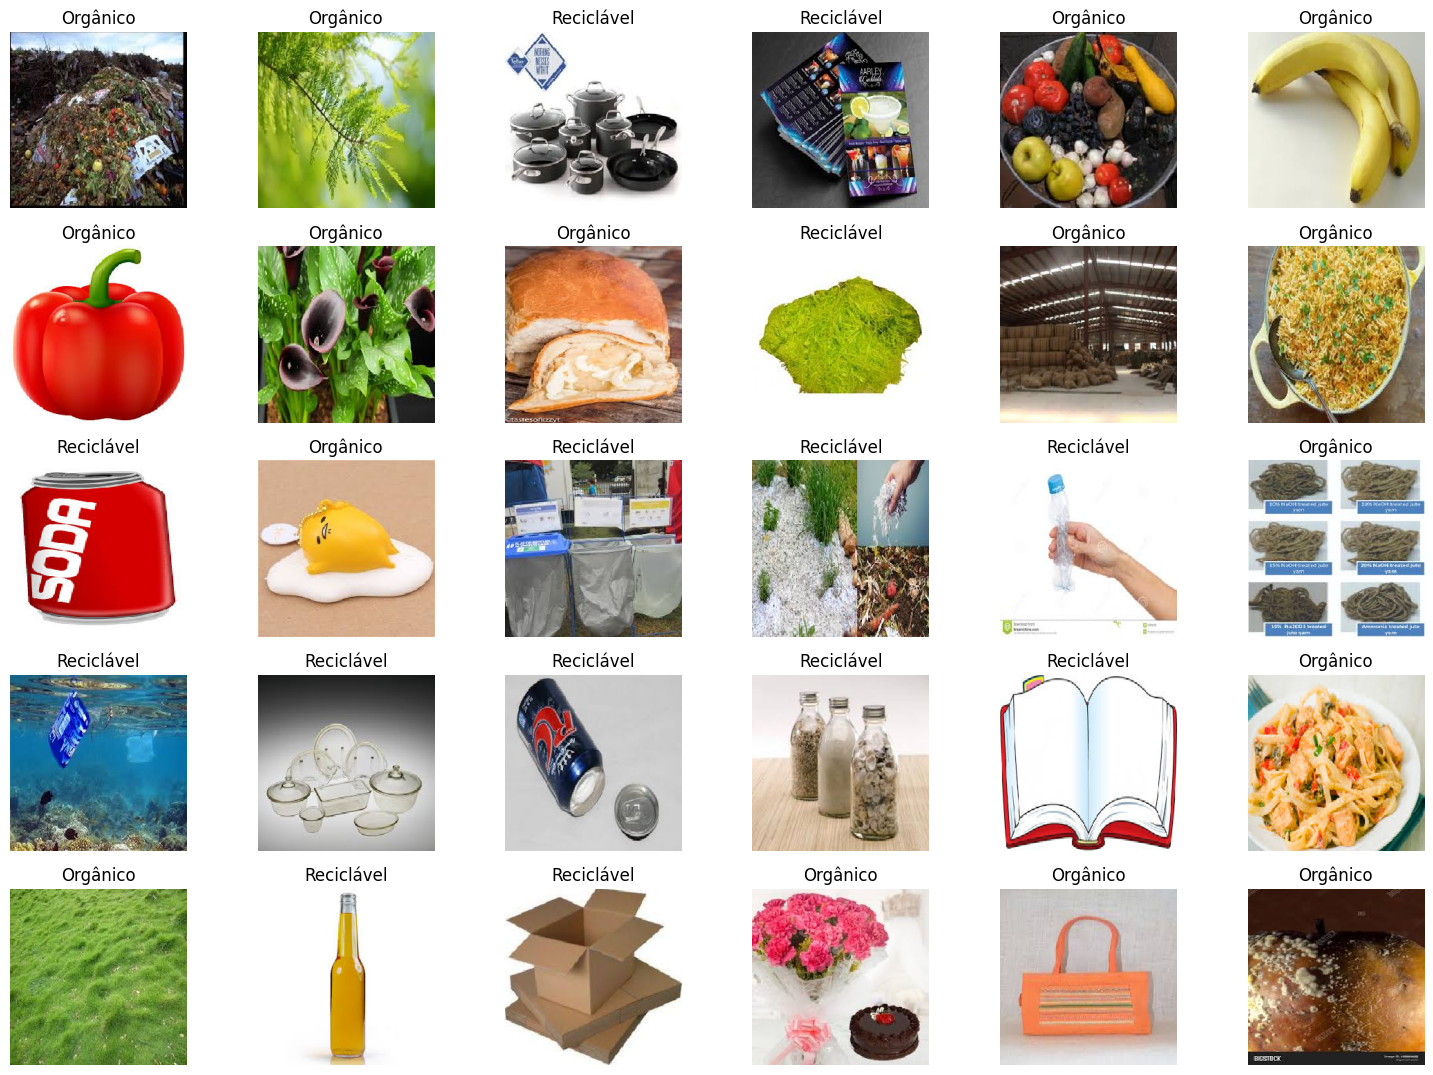

In [ ]:
img, labels = next(train_gen)

plt.figure(figsize=(15, 13))

for i in range(min(30, len(img))):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(img[i])
    title = "Orgânico" if labels[i][1] == 0 else "Reciclável"
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.show()


Utilizando a arquitetura VGGnet

In [ ]:
#Criando a rede neural e adicionando as layers...

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(l2=0.001)))
model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(l2=0.001)))
model.add(tf.keras.layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,317,218 (12.65 MB)

 Trainable params: 3,317,218 (12.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='Nadam',loss='CategoricalCrossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
best_model = ModelCheckpoint('bestmodel.keras', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
batch_size = 16

In [ ]:
#Compilação do modelo (aprox. 4 horas de treino)
history = model.fit(train_gen, validation_data=validation_gen, epochs=7, batch_size=batch_size, callbacks=[early_stopping_monitor, best_model, reduce_lr])

Epoch 1/7
177/177 ━━━━━━━━━━━━━━━━━━━━ 1819s 10s/step - accuracy: 0.7333 - loss: 0.6642 - val_accuracy: 0.8667 - val_loss: 0.3909 - learning_rate: 0.0010
Epoch 2/7
177/177 ━━━━━━━━━━━━━━━━━━━━ 1825s 10s/step - accuracy: 0.8454 - loss: 0.4100 - val_accuracy: 0.8842 - val_loss: 0.3528 - learning_rate: 0.0010
Epoch 3/7
177/177 ━━━━━━━━━━━━━━━━━━━━ 1829s 10s/step - accuracy: 0.8606 - loss: 0.3642 - val_accuracy: 0.8743 - val_loss: 0.3392 - learning_rate: 0.0010
Epoch 4/7
177/177 ━━━━━━━━━━━━━━━━━━━━ 1812s 10s/step - accuracy: 0.8722 - loss: 0.3428 - val_accuracy: 0.8918 - val_loss: 0.3112 - learning_rate: 0.0010
Epoch 5/7
177/177 ━━━━━━━━━━━━━━━━━━━━ 1801s 10s/step - accuracy: 0.8767 - loss: 0.3294 - val_accuracy: 0.8806 - val_loss: 0.3335 - learning_rate: 0.0010
Epoch 6/7
177/177 ━━━━━━━━━━━━━━━━━━━━ 1830s 10s/step - accuracy: 0.8862 - loss: 0.3077 - val_accuracy: 0.9009 - val_loss: 0.2858 - learning_rate: 0.0010
Epoch 7/7
177/177 ━━━━━━━━━━━━━━━━━━━━ 1793s 10s/step - accuracy: 0.8932 - l

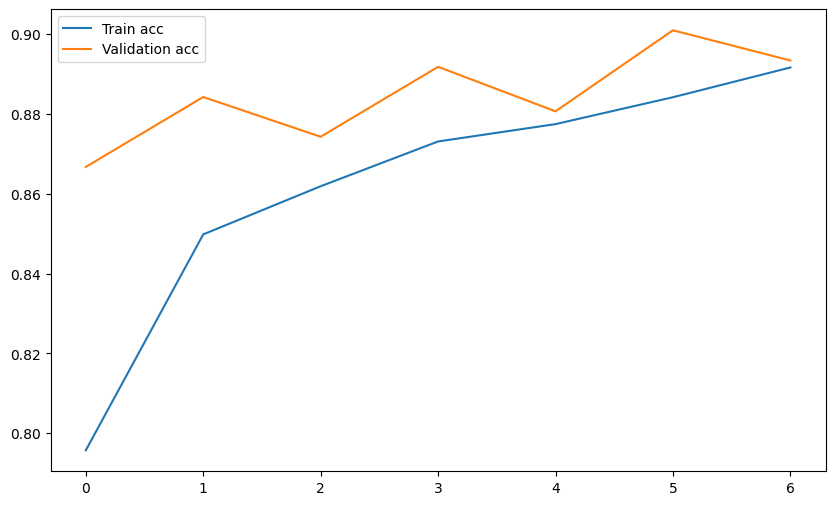

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(history.history["accuracy"], label = "Train acc")
plt.plot(history.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

In [ ]:
#Carregando o modelo para avaliação
model.load_weights('bestmodel.keras')
model.evaluate(validation_gen);

20/20 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.9027 - loss: 0.2901


In [ ]:
def predict_func(img):
    """
    Faz a predição de uma imagem usando um modelo de CNN.

    :param img: Uma imagem pré-processada como um array NumPy (shape: (1, altura, largura, canais)).
    :return: Previsões do modelo.
    """
    # Faz a predição
    result = model.predict(img)

    return result

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 640ms/step


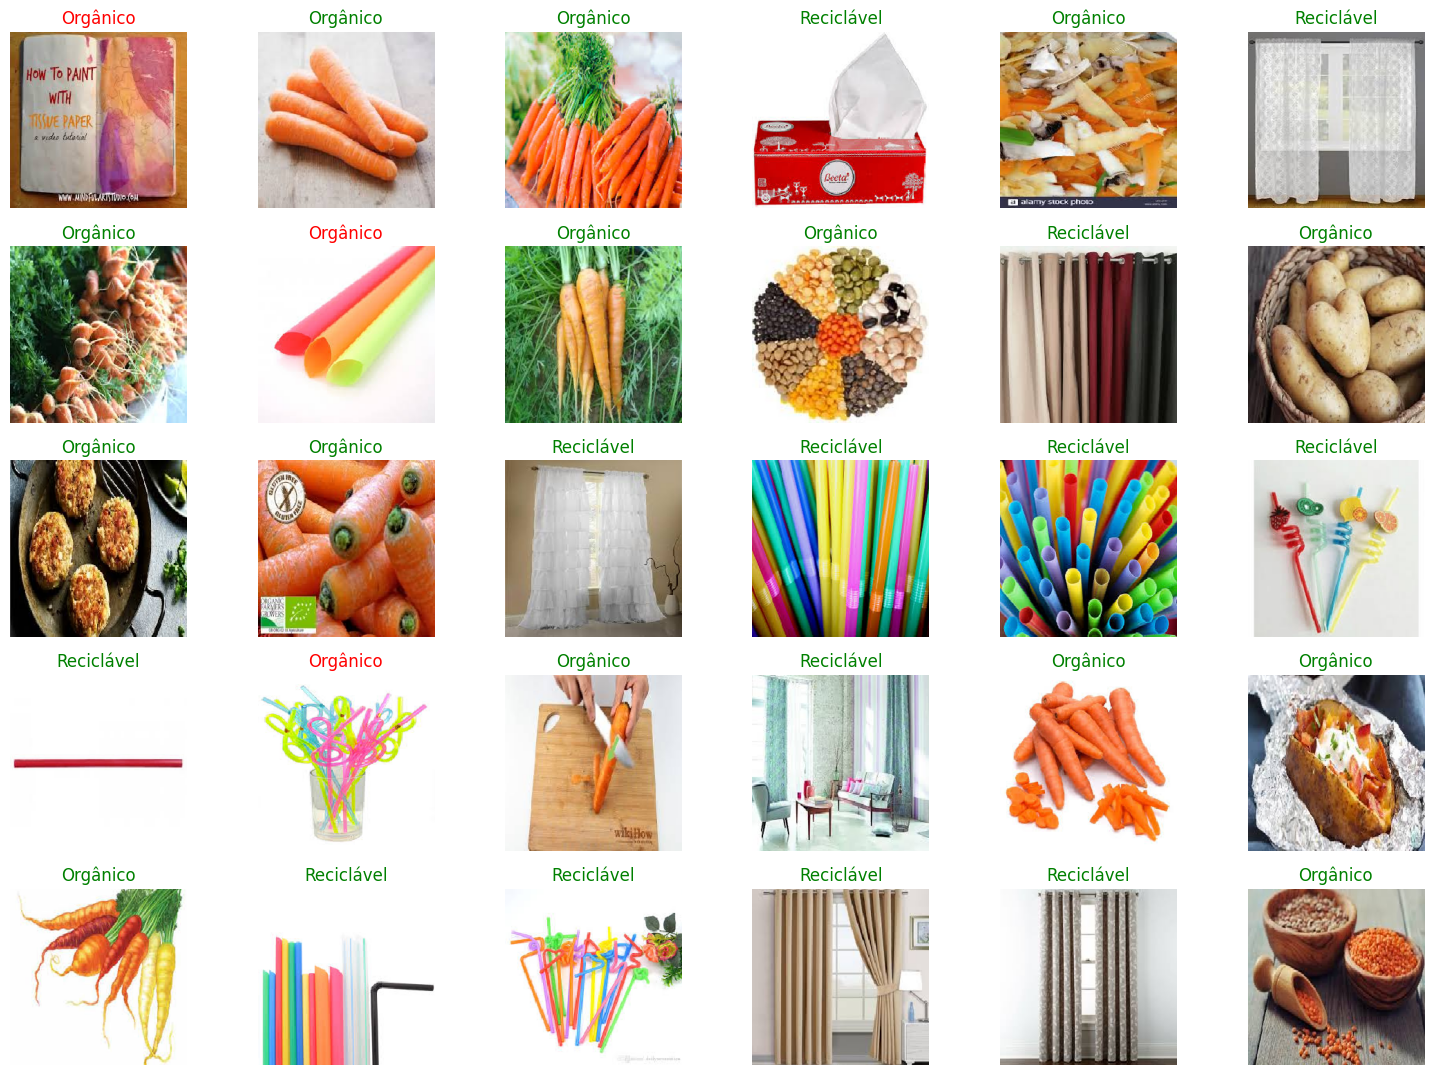

In [ ]:
# Obter um lote de imagens e rótulos do gerador de validação
img, labels = next(validation_gen)

# Configurar o tamanho da figura
plt.figure(figsize=(15, 13))

# Fazer a predição
results = model.predict(img)

# Exibir as imagens e as predições
for i in range(30):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(img[i])

    # Definir a classe predita com base no resultado
    pred = 1 if results[i][1] >= 0.5 else 0

    # Comparar a predição com o rótulo real
    if pred == labels[i][1]:
        title_color = 'green'
        title_text = "Reciclável" if pred == 1 else "Orgânico"
    else:
        title_color = 'red'
        title_text = "Reciclável" if pred == 1 else "Orgânico"

    # Definir o título da subplot
    plt.title(title_text, color=title_color)
    plt.axis("off")

# Exibir a figura
plt.tight_layout()
plt.show()

In [ ]:
train_accuracy = history.history['accuracy']  # Acurácia do treinamento
val_accuracy = history.history['val_accuracy']  # Acurácia da validação

print(f'Acurácia final de treinamento: {train_accuracy[-1]:.2f}')
print(f'Acurácia final de validação: {val_accuracy[-1]:.2f}')

Acurácia final de treinamento: 0.89
Acurácia final de validação: 0.89
